# Fast Voxel Traversal Algorithm for Ray Tracing
The calculate the ray tracing path through the voxel enviroment, the Fast Voxel Traversal Algorithm for Ray Tracing by {cite:t}`amanatides_fast` was used. This important paper presents an efficient algorithm for traversing voxels (3D pixels) in a grid during the ray tracing process. Ray tracing is a rendering technique widely used in computer graphics to simulate the way light interacts with objects in a scene. For the shadow flickering calculations, it is used to predict, where the induvidual rays will intersect with the terrain, and thus estimating which area will be affected by the shadow cast by the turbines.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import voxel_traversal, print_code
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

The traversal algorithm is divided into two phases: initialization and incremental traversal. In the initialization phase, the algorithm begins by locating the voxel containing the ray's origin. If the ray's origin is outside the grid, the entry point where the ray intersects the grid is determined, and that voxel becomes the starting point. The current voxel index is then set to the coordinates of the starting voxel. Additionally, the "step" variable is initialized to either 1 or -1, indicating whether the ray increments or decrements as it crosses voxel boundaries. This determination is made based on the sign of the x, y, and z components of the ray direction.

Next, the algorithm calculates the value of t at which the ray crosses the first vertical voxel boundary and stores it in the variable tMax. The minimum of these three values (x, y, and z) indicates the maximum distance the ray can travel while remaining in the current voxel. Finally, the algorithm computes tDelta, representing how far along the ray it must move (in units of t) for the horizontal component of the movement to equal the width of a voxel.

In the incremental phase of the traversal algorithm, the process is straightforward. The algorithm loops until it encounters a voxel with a boolean value equal to True (indicating a terrain collision) or until it falls out of the end of the grid.

In [2]:
HTML(print_code(voxel_traversal))

In the following test, the code is evaluated using a specified starting origin, direction, and boundaries. The function is configured to be verbose, printing the index of each intersected voxel during the process.

In [3]:
origin = np.array([5.5, 5.4, 6.5])
direction = np.array([-1, -1, -2])
grid3D = {"minBound" : np.array([0, 0, 0]),
          "maxBound" : np.array([10, 10, 10]),
        "n" : np.array([10, 10, 20])}
ids = voxel_traversal(origin, direction, grid3D, verbose=True)

Intersection: voxel = (5.0, 5.0, 13.0)
Intersection: voxel = (5.0, 5.0, 12.0)
Intersection: voxel = (5.0, 5.0, 11.0)
Intersection: voxel = (5.0, 4.0, 11.0)
Intersection: voxel = (5.0, 4.0, 10.0)
Intersection: voxel = (4.0, 4.0, 10.0)
Intersection: voxel = (4.0, 4.0, 9.0)
Intersection: voxel = (4.0, 4.0, 8.0)
Intersection: voxel = (4.0, 4.0, 7.0)
Intersection: voxel = (4.0, 3.0, 7.0)
Intersection: voxel = (4.0, 3.0, 6.0)
Intersection: voxel = (3.0, 3.0, 6.0)
Intersection: voxel = (3.0, 3.0, 5.0)
Intersection: voxel = (3.0, 3.0, 4.0)
Intersection: voxel = (3.0, 3.0, 3.0)
Intersection: voxel = (3.0, 2.0, 3.0)
Intersection: voxel = (3.0, 2.0, 2.0)
Intersection: voxel = (2.0, 2.0, 2.0)
Intersection: voxel = (2.0, 2.0, 1.0)
Intersection: voxel = (2.0, 2.0, 0.0)


By visualizing the voxel indices intersected by the `voxel_traversal` function and the ray as a 3D quiver plot, it can be demonstrated that all voxels touched by the quiver are accurately accounted for.

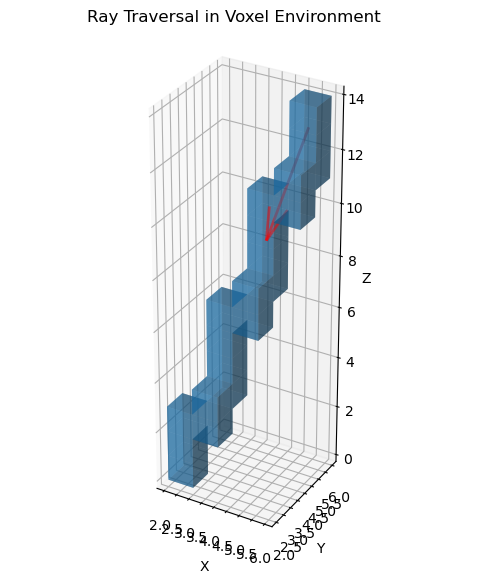

In [4]:
scale = (grid3D["maxBound"] - grid3D["minBound"])/grid3D["n"]
ids = np.stack(ids, axis=0)[:-1,:].astype(int)

x_min = np.min(ids[:, 0])
y_min = np.min(ids[:, 1])
z_min = np.min(ids[:, 2])

x_max = np.max(ids[:, 0]) + 1
y_max = np.max(ids[:, 1]) + 1
z_max = np.max(ids[:, 2]) + 1

x_range = np.arange(x_min, x_max + 1, 1)
y_range = np.arange(y_min, y_max + 1, 1)
z_range = np.arange(z_min, z_max + 1, 1)

x, y, z = np.meshgrid(x_range, y_range, z_range,
                      indexing="ij")  # define voxel grid

voxel_array = np.zeros((len(x_range), len(y_range), len(z_range)), dtype=bool)

voxel_array[ids[:, 0]-x_min, ids[:, 1]-y_min, ids[:, 2]-z_min] = True

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))
ax.voxels(x, y, z, voxel_array[0:-1, 0:-1, 0:-1], linewidth=0.5, alpha=0.5, label = "Voxels")

ax.quiver(*((origin-grid3D["minBound"])/scale), *(direction/scale), color="red", linewidth=2, alpha=0.5, label = "Ray")
ax.set(aspect="equal",
       xlabel = "X",
       ylabel = "Y",
       zlabel = "Z")
fig.suptitle("Ray Traversal in Voxel Environment")
plt.show()